## ACP avec Python - Tutoriel

Le tutoriel est disponible à ce lien : http://eric.univ-lyon2.fr/ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf.  


&nbsp;


[REQUIREMENTS.txt](#requirements)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
df = pd.read_excel("../data/excel/autos/autos-acp-diapos.xls", sheet_name="ind. x var. actives")

In [3]:
df.head()

,Modele,CYL,PUISS,LONG,LARG,POIDS,V.MAX
0,Alfasud TI,1350,79,393,161,870,165
1,Audi 100,1588,85,468,177,1110,160
2,Simca 1300,1294,68,424,168,1050,152
3,Citroen GS Club,1222,59,412,161,930,151
4,Fiat 132,1585,98,439,164,1105,165


In [4]:
df.columns = ["modele","cylindree","puissance","longueur","largeur","poids","vmax"]

In [5]:
df.head()

,modele,cylindree,puissance,longueur,largeur,poids,vmax
0,Alfasud TI,1350,79,393,161,870,165
1,Audi 100,1588,85,468,177,1110,160
2,Simca 1300,1294,68,424,168,1050,152
3,Citroen GS Club,1222,59,412,161,930,151
4,Fiat 132,1585,98,439,164,1105,165


In [6]:
df.duplicated().any()

False

In [7]:
numeric_cols = df.columns[1:]

#### 1. Analyse Univariée

In [8]:
# Résumé numérique des variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cylindree,18.0,1631.666667,373.929846,1166.0,1310.25,1577.5,1797.50,2664.0
puissance,18.0,84.611111,20.376281,55.0,70.75,82.0,98.00,128.0
longueur,18.0,433.500000,22.107358,393.0,424.00,434.5,448.00,469.0
largeur,18.0,166.666667,5.313689,157.0,162.25,167.0,169.75,177.0
poids,18.0,1078.833333,136.957808,815.0,1020.00,1087.5,1126.75,1370.0
vmax,18.0,158.277778,12.140383,140.0,151.25,160.0,165.00,180.0


In [9]:
# décrire le jeu de données avec scipy qui renvoie un peu plus de détails statistiques

descr = stats.describe(df.iloc[:,1:])._asdict()
descr["min"] = descr["minmax"][0]
descr["max"] = descr["minmax"][1]
descr.pop("minmax")
pd.DataFrame(descr, index=df.iloc[:,1:].columns).T


,cylindree,puissance,longueur,largeur,poids,vmax
nobs,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,1631.666667,84.611111,433.500000,166.666667,1078.833333,158.277778
variance,139823.529412,415.192810,488.735294,28.235294,18757.441176,147.388889
skewness,1.083530,0.388603,-0.171425,0.087411,0.165024,-0.075549
kurtosis,1.168789,-0.473091,-0.726509,-0.798229,0.215408,-0.875948
min,1166.000000,55.000000,393.000000,157.000000,815.000000,140.000000
max,2664.000000,128.000000,469.000000,177.000000,1370.000000,180.000000


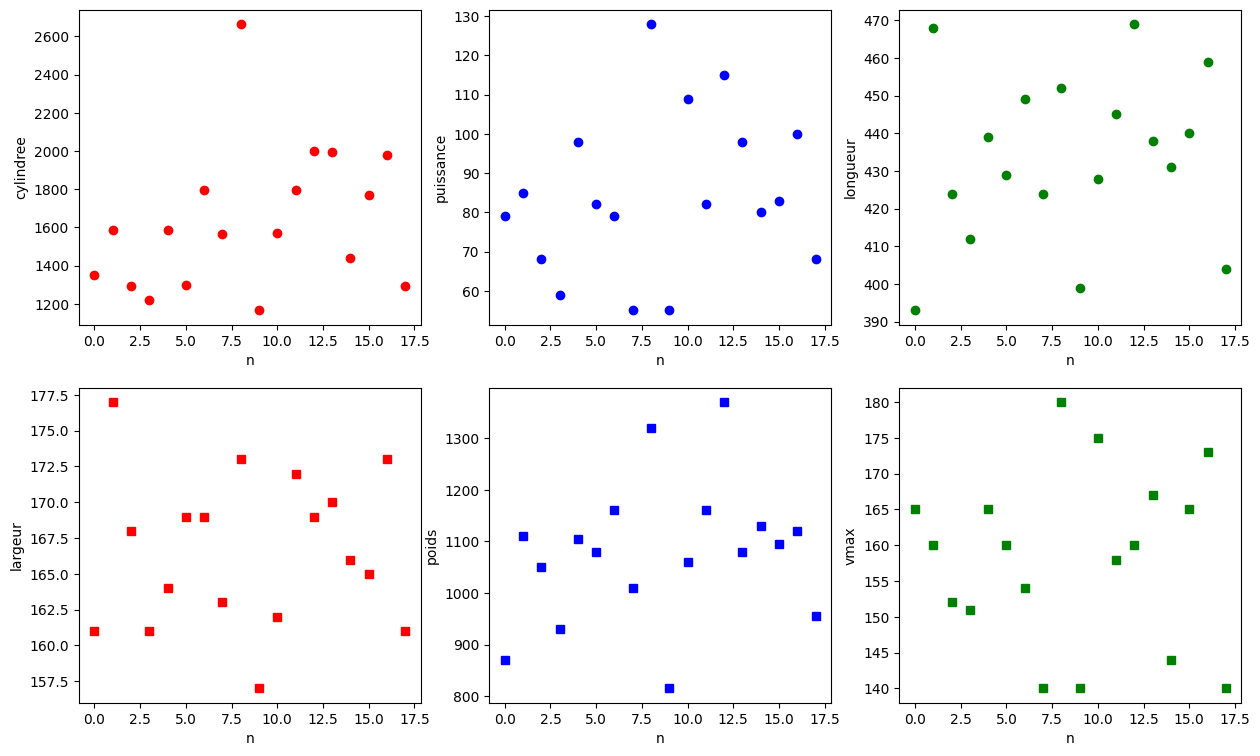

In [10]:
nrows = 2
ncols = 3
ls_format = ['ro','bo','go','rs','bs','gs']

plt.figure(figsize=[15,9])

for i, c in enumerate(zip(numeric_cols,ls_format)):
    plt.subplot(nrows,ncols,i+1)
    plt.plot(df[c[0]], c[1])
    plt.xlabel("n")
    plt.ylabel(c[0])

plt.show()

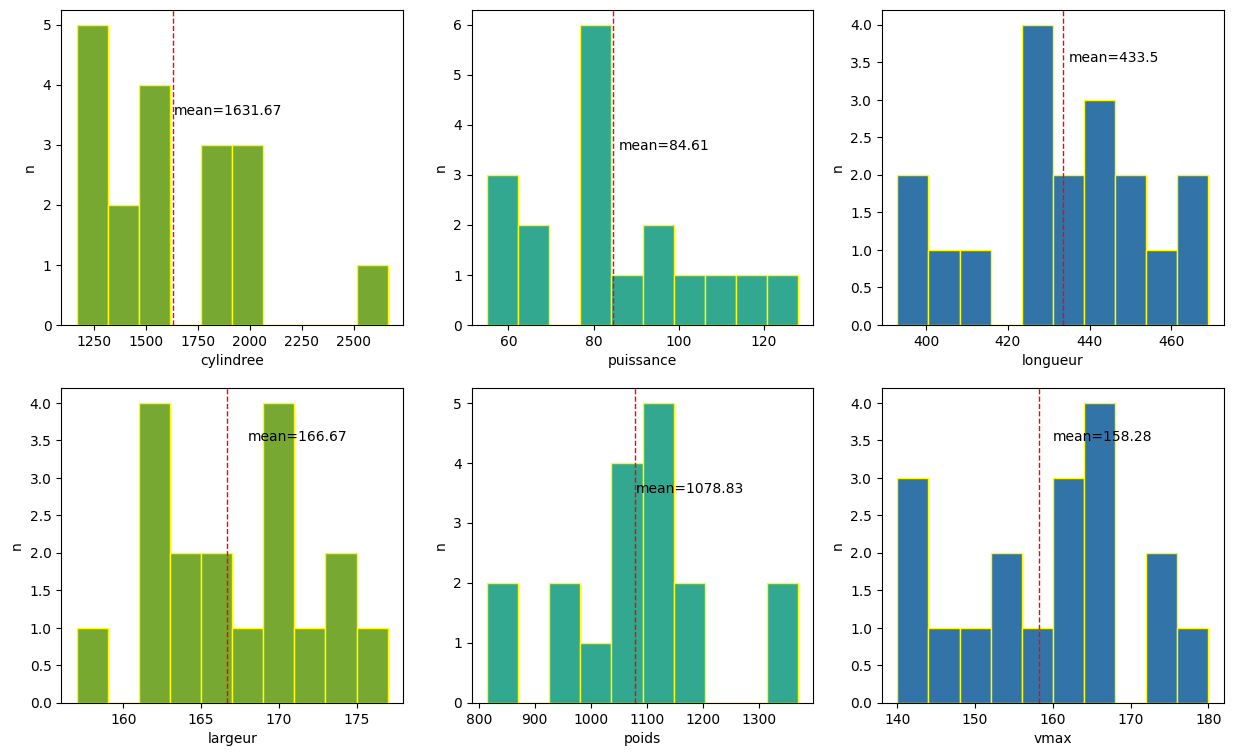

In [11]:
nrows = 2
ncols = 3
ls_colors = ['#77a832','#32a890','#3273a8','#77a832','#32a890','#3273a8']

plt.figure(figsize=[15,9])

for i, c in enumerate(zip(numeric_cols,ls_colors)):
    plt.subplot(nrows,ncols,i+1)
    plt.hist(df[c[0]], color=c[1], edgecolor="yellow")
    plt.axvline(df[c[0]].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.xlabel(c[0])
    plt.ylabel("n")
    plt.annotate(f"mean={round(df[c[0]].mean(),2)}", xy=(int(df[c[0]].mean()), 3.5),
                xytext=(int(df[c[0]].mean()) + 2, 3.5))

plt.show()

--------------------------------------------------------------------

#### 2. Analyse Bivariée

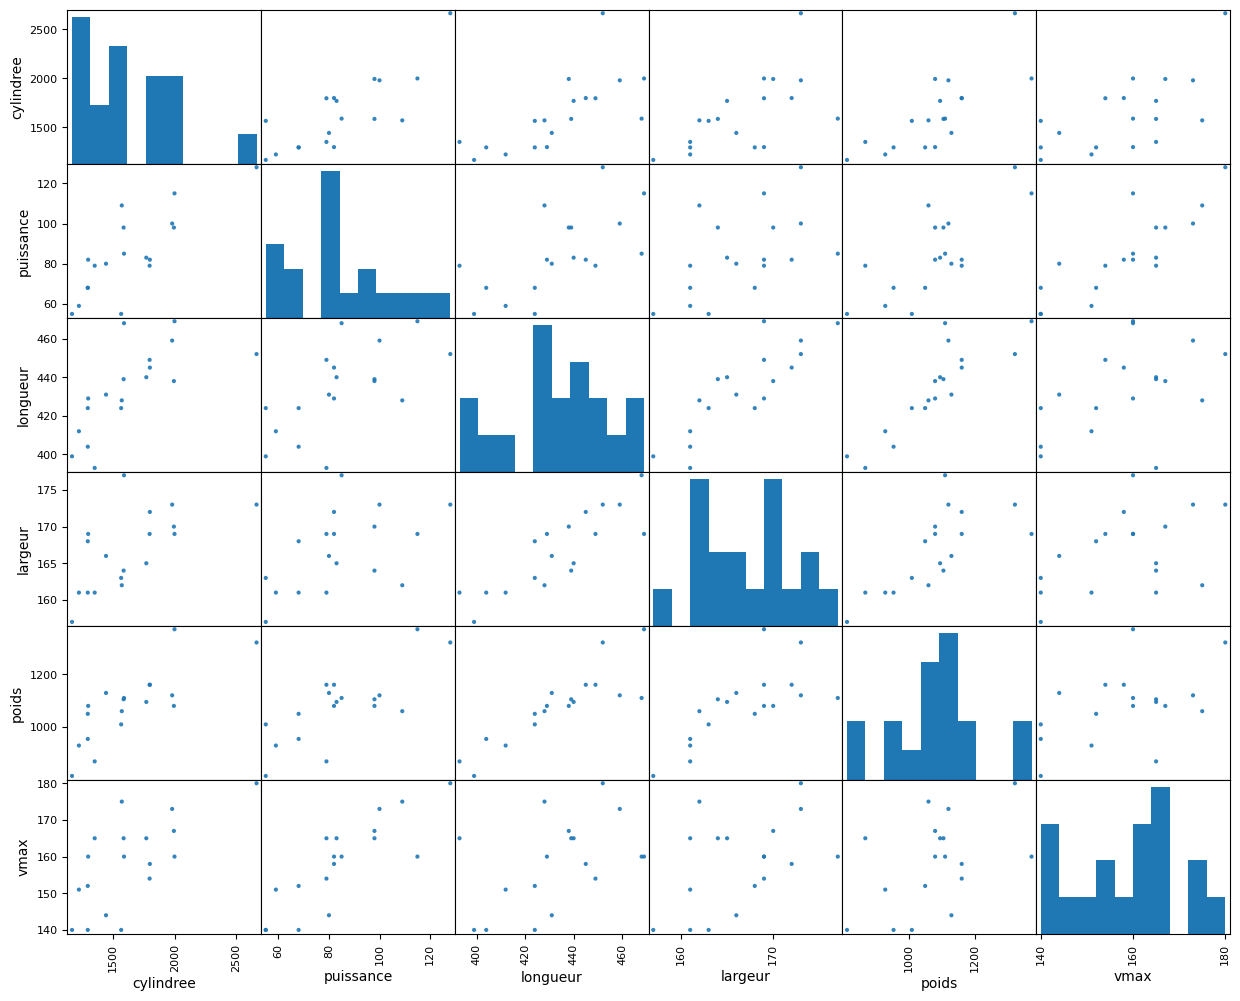

In [12]:
pd.plotting.scatter_matrix(df.iloc[:,1:], figsize=[15,12], alpha = 0.9)
plt.show()

In [13]:
from utils.funcs import heatmap, annotate_heatmap

In [14]:
# Matrice des corrélations
df.corr()

,cylindree,puissance,longueur,largeur,poids,vmax
cylindree,1.000000,0.796628,0.701462,0.629757,0.788952,0.664934
puissance,0.796628,1.000000,0.641362,0.520832,0.765293,0.844379
longueur,0.701462,0.641362,1.000000,0.849266,0.868090,0.475928
largeur,0.629757,0.520832,0.849266,1.000000,0.716874,0.472945
poids,0.788952,0.765293,0.868090,0.716874,1.000000,0.477596
vmax,0.664934,0.844379,0.475928,0.472945,0.477596,1.000000


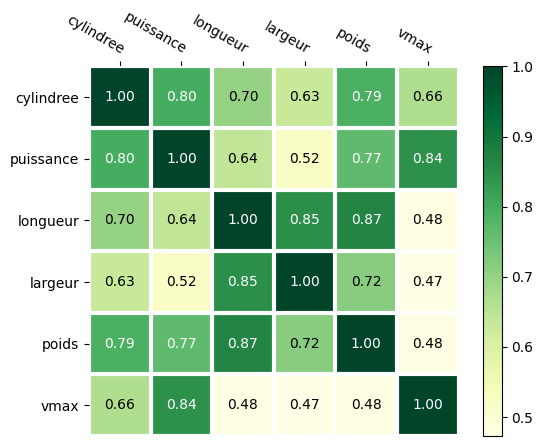

In [15]:
# Heatmap
corr = np.array(df.corr())

plt.figure()
im, cbar = heatmap(corr, df.corr().columns, df.corr().columns, cmap="YlGn")
texts = annotate_heatmap(im)


#### 3. Analyse Multivariée : ACP (basée sur la SVD)

In [16]:
n = df.shape[0]

p = df.drop("modele", axis=1).shape[1]

In [17]:
# Sandardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
arr = sc.fit_transform(df.drop("modele", axis=1))

In [18]:
arr

array([[-0.77509889, -0.28335818, -1.88508077, -1.09734528, -1.56900676,
         0.56976043],
       [-0.12016326,  0.01963869,  1.60580955,  2.0010414 ,  0.23416142,
         0.14597168],
       [-0.92920139, -0.83885242, -0.44217944,  0.25819889, -0.21663062,
        -0.53209032],
       [-1.12733318, -1.29334771, -1.00072189, -1.09734528, -1.11821472,
        -0.61684807],
       [-0.12841875,  0.67613189,  0.25599862, -0.51639778,  0.19659542,
         0.56976043],
       [-0.9209459 , -0.13185975, -0.20945342,  0.45184806,  0.0087654 ,
         0.14597168],
       [ 0.45221746, -0.28335818,  0.72145067,  0.45184806,  0.60982146,
        -0.36257482],
       [-0.18345536, -1.49534562, -0.44217944, -0.71004695, -0.51715865,
        -1.54918332],
       [ 2.84080623,  2.19111619,  0.86108628,  1.22644473,  1.81193359,
         1.84112668],
       [-1.28143568, -1.49534562, -1.60580955, -1.87194195, -1.98223281,
        -1.54918332],
       [-0.16969621,  1.23162613, -0.25599862, -0.

In [19]:
# check moyenne = 0 pour chaque colonne
np.mean(arr, axis=0)

array([-2.22044605e-16, -1.41861831e-16,  0.00000000e+00,  1.86270752e-15,
        5.73615229e-16,  5.55111512e-16])

In [20]:
# check écart-type = 1 pour chaque colonne
np.std(arr, axis=0)

array([1., 1., 1., 1., 1., 1.])

In [21]:
from sklearn.decomposition import PCA

acp = PCA(svd_solver="full")
print(acp.__dict__)

{'n_components': None, 'copy': True, 'whiten': False, 'svd_solver': 'full', 'tol': 0.0, 'iterated_power': 'auto', 'random_state': None}


In [22]:
# Coordonnées factorielles des individus
coords = acp.fit_transform(arr)
print(acp.n_components_)

6


In [ ]:
## Variance expliquée (= valeurs propres)

val_propres = (acp.singular_values_**2/n)
val_propres

In [24]:
## Proportion de variance expliquée par chaque axe

ratio_expliq = acp.explained_variance_ratio_
ratio_expliq

array([0.73680968, 0.14267705, 0.06217768, 0.03565368, 0.01546687,
       0.00721505])

La 1ère composante explique 73.68% de la variance. Avec les deux premières composantes, on récupère 87,94% de l'information contenue dans nos données.

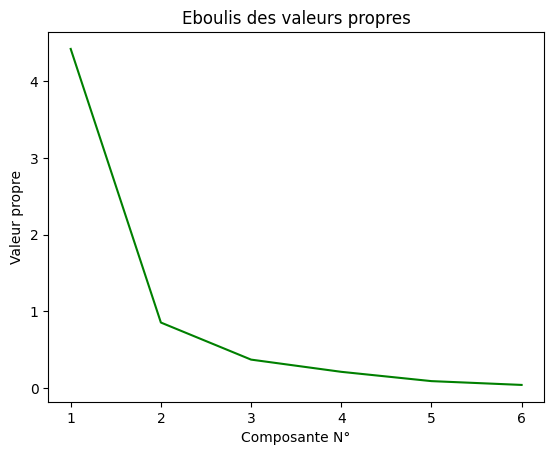

In [25]:
abcisse = np.arange(1, p+1)

plt.plot(abcisse, val_propres, "g-")
plt.title("Eboulis des valeurs propres")
plt.xlabel("Composante N°")
plt.ylabel("Valeur propre")
plt.show()

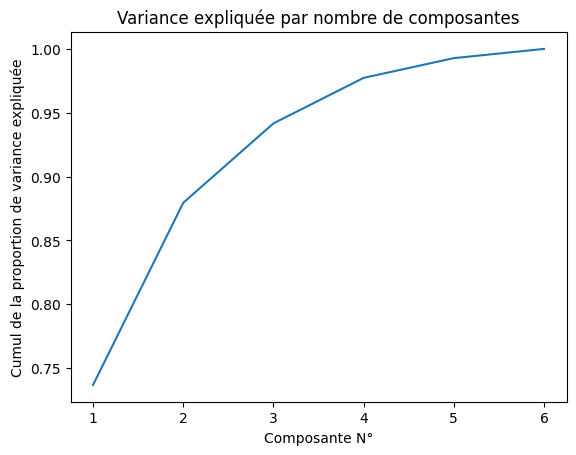

In [26]:
plt.plot(np.arange(1, p+1),np.cumsum(ratio_expliq))
plt.title("Variance expliquée par nombre de composantes")
plt.ylabel("Cumul de la proportion de variance expliquée")
plt.xlabel("Composante N°")
plt.show()

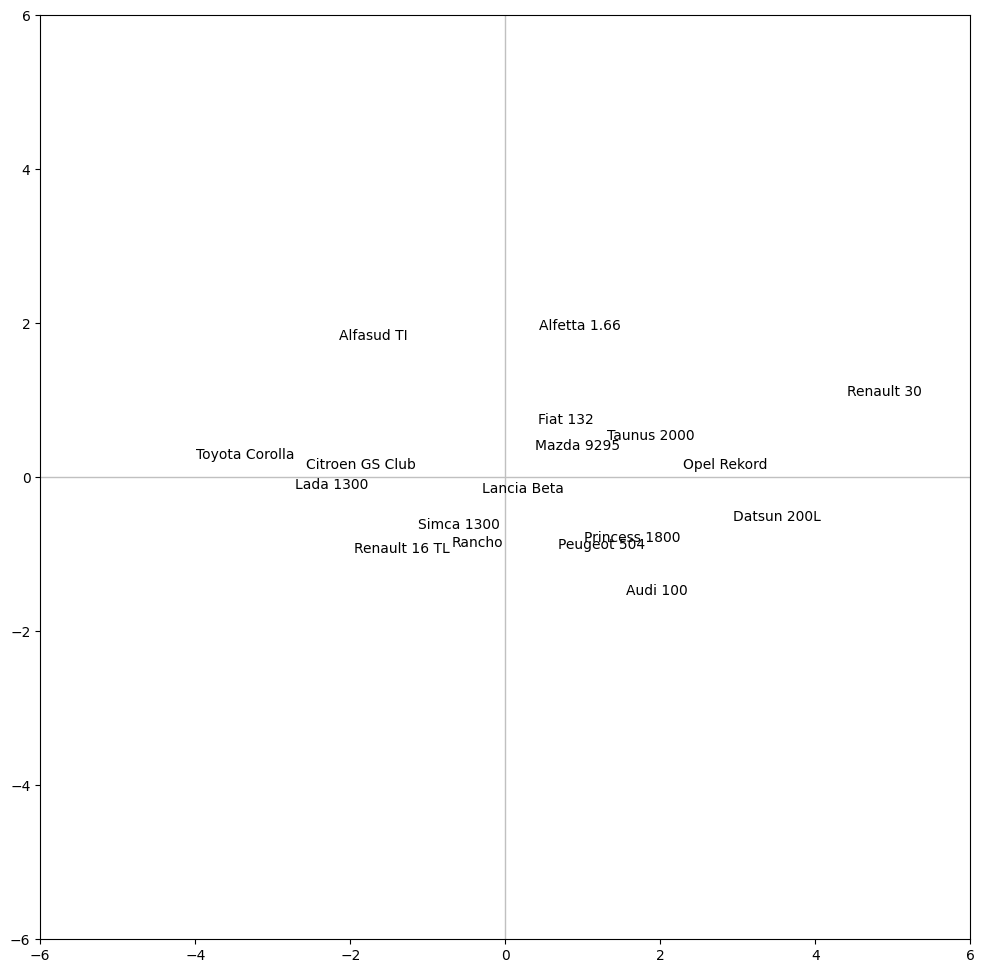

In [27]:
## Premier plan factoriel avec les axes 1 et 2
fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(n):
    plt.annotate(df.modele[i], (coords[i,0], coords[i,1]))

plt.plot([-6,6], [0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0], [-6,6], color="silver", linestyle="-", linewidth=1)

plt.show()

In [28]:
## Qualité de représentation des individus sur les axes avec le COS²
di = np.sum(arr**2, axis=1)
df_dists_i = pd.DataFrame({"modele":df.modele, "di":di})

cos2 = coords**2

for j in range(p):
    cos2[:,j] = cos2[:,j]/di

dict_cos2 = {f"COS2_{x+1}":cos2[:,x] for x in range(p)}

df_cos2 = pd.DataFrame(dict({"modele":df.modele}, **dict_cos2))


In [29]:
# check somme des COS² par individu = 1 (par ligne)
np.sum(cos2, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [30]:
df_cos2

,modele,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5,COS2_6
0,Alfasud TI,0.556218,0.387670,0.039759,0.004957,0.011041,0.000353
1,Audi 100,0.365334,0.349406,0.259215,0.006693,0.003305,0.016046
2,Simca 1300,0.580284,0.210694,0.096545,0.013013,0.065251,0.034213
3,Citroen GS Club,0.976992,0.001879,0.003256,0.000044,0.007590,0.010239
4,Fiat 132,0.156579,0.413826,0.031955,0.337069,0.059391,0.001181
5,Lancia Beta,0.081555,0.033900,0.402405,0.272321,0.174546,0.035273
6,Peugeot 504,0.309202,0.575488,0.043600,0.027276,0.028778,0.015655
7,Renault 16 TL,0.673539,0.170535,0.068101,0.070483,0.015247,0.002094
8,Renault 30,0.892431,0.051920,0.016167,0.032944,0.006450,0.000089
9,Toyota Corolla,0.975219,0.003426,0.005641,0.004315,0.004759,0.006640


In [31]:
## Contribution des individus à la construction des axes (CTR)
ctr = coords**2

for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*val_propres[j])

dict_ctr = {f"CTR_{x+1}":ctr[:,x] for x in range(p)}
df_ctr = pd.DataFrame(dict({"modele":df.modele}, **dict_ctr))


In [32]:
# check somme des CTR par variable = 1 (par colonne)
np.sum(ctr, axis=0)

array([1., 1., 1., 1., 1., 1.])

In [33]:
df_ctr

,modele,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5,CTR_6
0,Alfasud TI,0.057493,0.206933,0.048700,0.010589,0.054367,0.003731
1,Audi 100,0.030640,0.151329,0.257616,0.011601,0.013204,0.137425
2,Simca 1300,0.015746,0.029525,0.031045,0.007297,0.084349,0.094808
3,Citroen GS Club,0.083244,0.000827,0.003287,0.000078,0.030808,0.089088
4,Fiat 132,0.002300,0.031398,0.005563,0.102341,0.041567,0.001771
5,Lancia Beta,0.001163,0.002497,0.068011,0.080266,0.118594,0.051376
6,Peugeot 504,0.005878,0.056499,0.009822,0.010716,0.026063,0.030393
7,Renault 16 TL,0.047711,0.062384,0.057165,0.103179,0.051452,0.015147
8,Renault 30,0.244369,0.073419,0.052460,0.186420,0.084136,0.002484
9,Toyota Corolla,0.199640,0.003622,0.013684,0.018254,0.046409,0.138817


In [34]:
## Représentation des variables et outils d'aide à l'interprétation
vec_propres = acp.components_
sqrt_valprop = np.sqrt(val_propres)
corr_var_cp = np.zeros((p,p))

for k in range(p):
    corr_var_cp[:,k] = vec_propres[k,:] * sqrt_valprop[k]

dict_corrvarcp = {f"COR_CP_{x+1}":corr_var_cp[:,x] for x in range(p)}
df_corrvarcp = pd.DataFrame(dict({"variables":df.drop("modele",axis=1).columns}, **dict_corrvarcp))


In [35]:
df_corrvarcp

,variables,COR_CP_1,COR_CP_2,COR_CP_3,COR_CP_4,COR_CP_5,COR_CP_6
0,cylindree,0.893464,0.114906,-0.215983,0.373615,0.046176,-0.012254
1,puissance,0.886858,0.384689,-0.112948,-0.165485,-0.089481,-0.131711
2,longueur,0.886155,-0.381029,0.041310,-0.129390,0.222555,-0.039593
3,largeur,0.813536,-0.412736,0.369448,0.097854,-0.145672,-0.022797
4,poids,0.905187,-0.224532,-0.295865,-0.139547,-0.092779,0.120846
5,vmax,0.754710,0.573519,0.296522,-0.034029,0.057471,0.095401


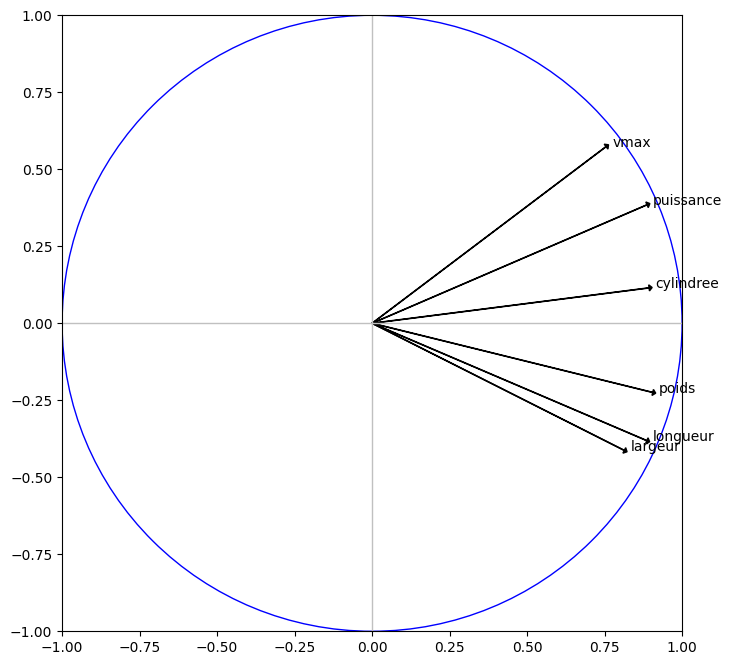

In [36]:
## Cercle de corrélations

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(df_corrvarcp.iloc[j,0], (df_corrvarcp.iloc[j,1] + 0.02,df_corrvarcp.iloc[j,2])) 
    plt.arrow(0,0,df_corrvarcp.iloc[j,1],df_corrvarcp.iloc[j,2],head_width=0.02, head_length=0.01, fc="k")

plt.plot([-1,1], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0], [-1,1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)


In [37]:
## Qualité de représentation des variables avec le COS² des variables
df_cosvaracp = df_corrvarcp.copy()
df_cosvaracp.iloc[:,1:] = df_cosvaracp.iloc[:,1:]**2

dict_rename = {f"COR_CP_{x+1}":f"COS_VAR_CP{x+1}" for x in range(p)}
df_cosvaracp.rename(columns=dict_rename, inplace=True)

In [39]:
# Vércheck somme des cosinus pour chaque ligne = 1

df_cosvaracp.sum(axis=1)

C:\Users\Nelly\AppData\Local\Temp\ipykernel_664\3036462373.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_cosvaracp.sum(axis=1)


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

In [40]:
df_cosvaracp

,variables,COS_VAR_CP1,COS_VAR_CP2,COS_VAR_CP3,COS_VAR_CP4,COS_VAR_CP5,COS_VAR_CP6
0,cylindree,0.798277,0.013203,0.046649,0.139588,0.002132,0.000150
1,puissance,0.786517,0.147986,0.012757,0.027385,0.008007,0.017348
2,longueur,0.785270,0.145183,0.001707,0.016742,0.049531,0.001568
3,largeur,0.661841,0.170351,0.136492,0.009575,0.021220,0.000520
4,poids,0.819364,0.050415,0.087536,0.019473,0.008608,0.014604
5,vmax,0.569588,0.328925,0.087925,0.001158,0.003303,0.009101


In [41]:
## Contribution des variables à la construction des axes (CTR)
df_ctrvar = df_cosvaracp.copy()
for k in range(p):
    df_ctrvar.iloc[:,k+1] = df_ctrvar.iloc[:,k+1]/val_propres[k]

dict_rename = {f"COS_VAR_CP{x+1}":f"CTR_VAR_CP{x+1}" for x in range(p)}
df_ctrvar.rename(columns=dict_rename, inplace=True)


In [42]:
# check somme des contributions de chaque variable = 1 
df_ctrvar.sum(axis=1)

C:\Users\Nelly\AppData\Local\Temp\ipykernel_664\1777684595.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_ctrvar.sum(axis=1)


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
dtype: float64

In [43]:
df_ctrvar

,variables,CTR_VAR_CP1,CTR_VAR_CP2,CTR_VAR_CP3,CTR_VAR_CP4,CTR_VAR_CP5,CTR_VAR_CP6
0,cylindree,0.180571,0.015423,0.125042,0.652519,0.022977,0.003469
1,puissance,0.177911,0.172868,0.034196,0.128015,0.086280,0.400731
2,longueur,0.177628,0.169594,0.004574,0.078261,0.533731,0.036211
3,largeur,0.149709,0.198994,0.365865,0.044762,0.228666,0.012005
4,poids,0.185341,0.058892,0.234639,0.091030,0.092756,0.337343
5,vmax,0.128841,0.384230,0.235683,0.005413,0.035591,0.210242


### Ajout des Individus illustratifs

Ils se trouvent dans le fichier Excel de données, feuille 'ind.illustratives' sur les 2 dernières lignes.  
Nous devons les charger et leur appliquer les 2 traitements suivants avant de les ajouter aux différents graphiques :
1. Standardiser en utilisant les paramètres calculés pour les variables actives (moyenne, écart-type)

2. Calculer leurs coordonnées avec la fonction 'transform()' de l'objet acp qu'on a utilisé


In [49]:
# Import
indiv_supp = pd.read_excel("data/autos-acp-diapos.xls", sheet_name="ind.illustratives", skiprows=19, header=None,\
                           names=['modele', 'cylindree', 'puissance', 'longueur', 'largeur', 'poids','vmax'])

indiv_supp

,modele,cylindree,puissance,longueur,largeur,poids,vmax
0,Peugeot 604,2664,136,472,177,1410,180
1,Peugeot 304 S,1288,74,414,157,915,160


In [50]:
# Standardiser avec les paramètres des individus actifs

cr_indiv_supp = sc.transform(indiv_supp.drop("modele", axis=1))  
cr_indiv_supp

array([[ 2.84080623,  2.59511201,  1.79199036,  2.0010414 ,  2.48812166,
         1.84112668],
       [-0.94571238, -0.53585556, -0.90763148, -1.87194195, -1.23091273,
         0.14597168]])

In [51]:
# Calculer les coordonnées factorielles
coords_indiv_supp = acp.transform(cr_indiv_supp)
coords_indiv_supp

array([[ 5.56329226,  0.33860928, -0.46428878,  0.40214608, -0.38981076,
        -0.08102064],
       [-2.21224139,  1.25777905, -0.09304388, -0.35370189,  0.648528  ,
         0.12473042]])

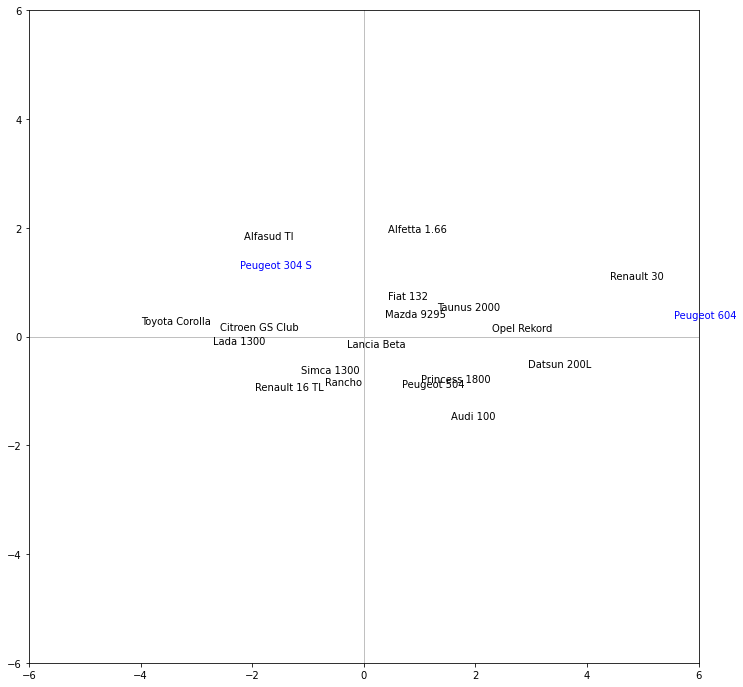

In [52]:
# On les ajoute sur au premier plan factoriel

fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for i in range(n):
    plt.annotate(df.modele[i], (coords[i,0], coords[i,1]))
    
for i in range(coords_indiv_supp.shape[0]):
    plt.annotate(indiv_supp.modele[i], (coords_indiv_supp[i,0], coords_indiv_supp[i,1]), color="b")

plt.plot([-6,6], [0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0], [-6,6], color="silver", linestyle="-", linewidth=1)

plt.show()

### Ajout des Variables illustratives

Elles se trouvent dans le fichier Excel de données, feuille 'var.illustratives' sur les 4 premières colonnes.  
Nous devons les charger et leur appliquer des traitements, avant de les ajouter aux différents graphiques :

1. Si la variable est quantitative, calculer sa corrélation avec les composantes et l'ajouter au cercle

2. Si la variable est qualitative, on peut représenter ses modalités, ou alors les utiliser pour distinguer les individus sur le plan factoriel (colorier par modalité)


In [44]:
# Import
var_supp = pd.read_excel("../data/excel/autos/autos-acp-diapos.xls", sheet_name="var.illustratives",\
                         usecols=["Modele","FINITION","PRIX","R.POID.PUIS"])

var_supp

,Modele,FINITION,PRIX,R.POID.PUIS
0,Alfasud TI,2_B,30570,11.012658
1,Audi 100,3_TB,39990,13.058824
2,Simca 1300,1_M,29600,15.441176
3,Citroen GS Club,1_M,28250,15.762712
4,Fiat 132,2_B,34900,11.275510
5,Lancia Beta,3_TB,35480,13.170732
6,Peugeot 504,2_B,32300,14.683544
7,Renault 16 TL,2_B,32000,18.363636
8,Renault 30,3_TB,47700,10.312500
9,Toyota Corolla,1_M,26540,14.818182


In [45]:
# Renommer les colonnes
var_supp.columns = ["modele","finition","prix","rapport_poids_puiss"]

#### 1. Variables supplémentaires quantitatives

In [46]:
var_supp_quanti = var_supp.loc[:,["prix","rapport_poids_puiss"]].values
var_supp_quanti

array([[3.05700000e+04, 1.10126582e+01],
       [3.99900000e+04, 1.30588235e+01],
       [2.96000000e+04, 1.54411765e+01],
       [2.82500000e+04, 1.57627119e+01],
       [3.49000000e+04, 1.12755102e+01],
       [3.54800000e+04, 1.31707317e+01],
       [3.23000000e+04, 1.46835443e+01],
       [3.20000000e+04, 1.83636364e+01],
       [4.77000000e+04, 1.03125000e+01],
       [2.65400000e+04, 1.48181818e+01],
       [4.23950000e+04, 9.72477064e+00],
       [3.39900000e+04, 1.41463415e+01],
       [4.39800000e+04, 1.19130435e+01],
       [3.50100000e+04, 1.10204082e+01],
       [3.94500000e+04, 1.41125000e+01],
       [2.79000000e+04, 1.31927711e+01],
       [3.27000000e+04, 1.12000000e+01],
       [2.21000000e+04, 1.40441176e+01]])

In [47]:
# Calculer la corrélation entre ces variables et les axes factoriels

corr_var_supp = np.zeros((var_supp_quanti.shape[1],p))

for k in range(p):
    for j in range(var_supp_quanti.shape[1]):
        corr_var_supp[j,k] = np.corrcoef(var_supp_quanti[:,j], coords[:,k])[0,1]

corr_var_supp

array([[ 0.77247524,  0.08670844, -0.13389277, -0.22582891, -0.15944978,
        -0.10254878],
       [-0.58903888, -0.67254512, -0.15017616,  0.21365718,  0.10162791,
         0.28999742]])

On obtient une matrice 2x6 (car on avait 2 variables illustratives et 6 composantes)

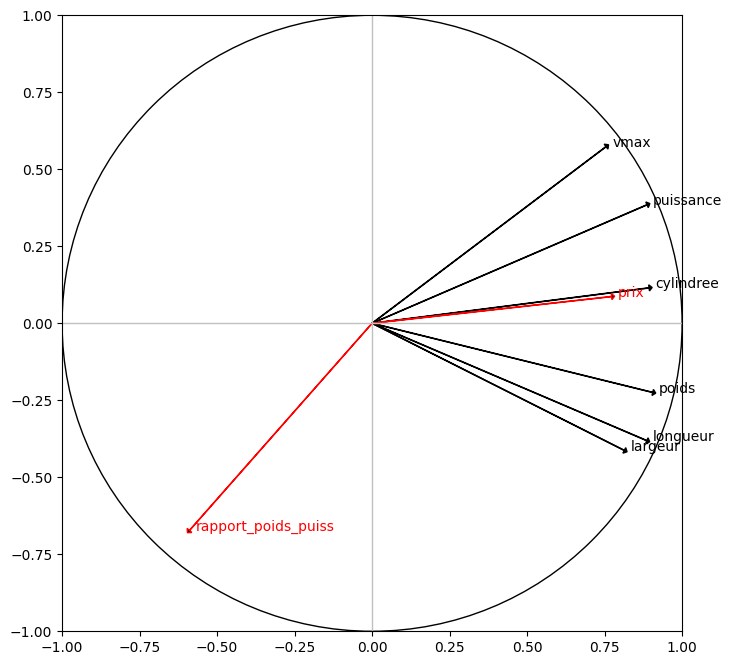

In [48]:
# On les ajoute sur le cercle des corrélations

fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(p):
    plt.annotate(df_corrvarcp.iloc[j,0], (df_corrvarcp.iloc[j,1] + 0.02,df_corrvarcp.iloc[j,2]))    
    plt.arrow(0,0,df_corrvarcp.iloc[j,1],df_corrvarcp.iloc[j,2],head_width=0.02, head_length=0.01, fc="k")

for j in range(var_supp_quanti.shape[1]):
    plt.annotate(var_supp.columns[j+2], (corr_var_supp[j,0] + 0.02,corr_var_supp[j,1]), color="r")    
    plt.arrow(0,0,corr_var_supp[j,0],corr_var_supp[j,1],head_width=0.02, head_length=0.01, fc="k", color="r")

plt.plot([-1,1], [0,0], color='silver', linestyle='-', linewidth=1)
plt.plot([0,0], [-1,1], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0,0),1,color='black',fill=False)
axes.add_artist(cercle)

#### 2. Variable supplémentaire qualitative

In [49]:
var_supp_quali = var_supp.loc[:, ["modele","finition"]]
var_supp_quali

,modele,finition
0,Alfasud TI,2_B
1,Audi 100,3_TB
2,Simca 1300,1_M
3,Citroen GS Club,1_M
4,Fiat 132,2_B
5,Lancia Beta,3_TB
6,Peugeot 504,2_B
7,Renault 16 TL,2_B
8,Renault 30,3_TB
9,Toyota Corolla,1_M


In [50]:
modalites = var_supp_quali.finition.unique()

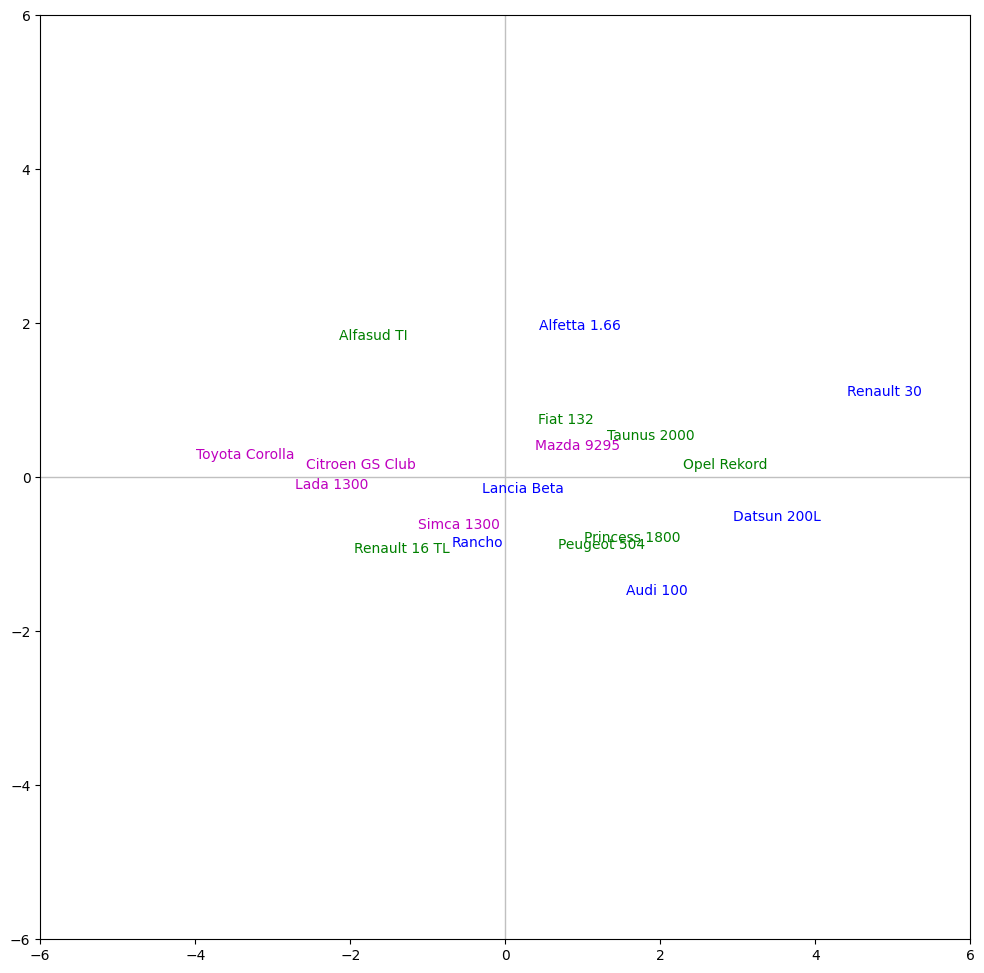

In [51]:
# Colorier les individus du plan factoriel par modalités de la variable supplémentaire

couleurs = ['g','b','m']

fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for c in range(len(modalites)):
    no = np.where(var_supp_quali == modalites[c])
    
    for i in no[0]:
        plt.annotate(df.modele[i], (coords[i,0], coords[i,1]), color=couleurs[c])


plt.plot([-6,6], [0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0], [-6,6], color="silver", linestyle="-", linewidth=1)

plt.show()

In [52]:
## Calculer les positions des barycentres
df2 = pd.DataFrame({"finition":var_supp_quali.finition,"F1":coords[:,0],"F2":coords[:,1]})
df_barycentres = df2.pivot_table(index="finition", values=["F1","F2"], aggfunc="mean").reset_index()
df_barycentres

,F1,F2
finition,,
1_M,-2.000355,-0.022579
2_B,0.235313,0.045271
3_TB,1.392430,-0.034001


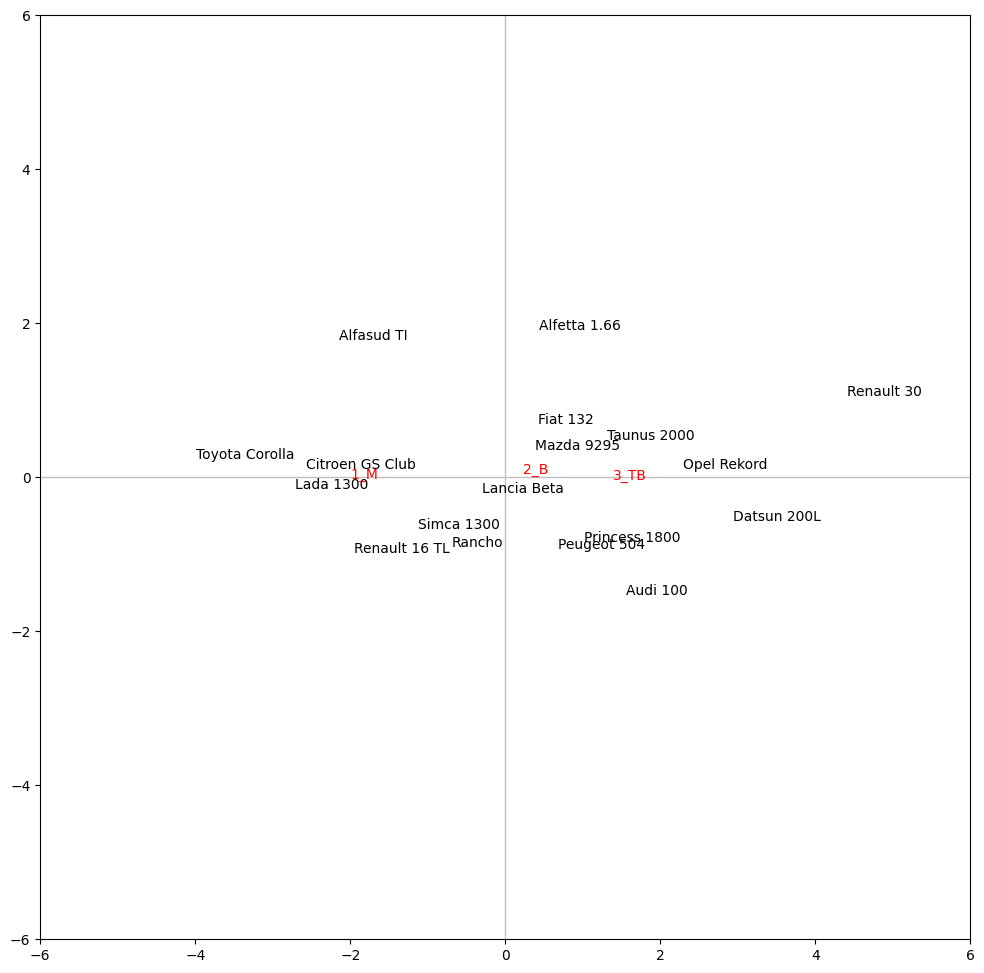

In [71]:
# Placer ces barycentres dans le plan factoriel

fig, axes = plt.subplots(figsize=(12,12)) 
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

for c in range(len(modalites)):
    no = np.where(var_supp_quali == modalites[c])
    
    for i in no[0]:
        plt.annotate(df.modele[i], (coords[i,0], coords[i,1]))

for c in range(df_barycentres.shape[0]):
    plt.annotate(df_barycentres.iloc[c,0], (df_barycentres.iloc[c,1], df_barycentres.iloc[c,2]), color='r')


plt.plot([-6,6], [0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0], [-6,6], color="silver", linestyle="-", linewidth=1)

plt.show()

## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.8</span>

Requirements.txt  

```
absl-py==2.1.0
anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0       
arrow==1.2.3
asttokens==2.4.0
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==4.2.4
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==2.0.12
colorama==0.4.6
comm==0.1.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.42.1
fqdn==1.5.1
gast==0.3.3
google-auth==1.35.0
google-auth-oauthlib==0.4.6        
google-pasta==0.2.0
grpcio==1.66.2
h5py==2.10.0
htmlmin==0.1.12
idna==3.4
ImageHash==4.3.1
importlib-metadata==8.5.0
importlib-resources==6.4.5
ipykernel==6.25.2
ipython==8.12.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.1.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.0
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-client==8.3.1
jupyter-console==6.6.3
jupyter-core==5.3.1
jupyter-events==0.7.0
jupyter-lsp==2.2.0
jupyter-server==2.7.3
jupyter-server-terminals==0.4.4
jupyterlab==4.0.6
jupyterlab-pygments==0.2.2
jupyterlab-server==2.25.0
jupyterlab-widgets==3.0.9
Keras==2.4.3
Keras-Preprocessing==1.1.2
kiwisolver==1.4.5
Markdown==3.7
MarkupSafe==2.1.3
matplotlib==3.5.3
matplotlib-inline==0.1.6
missingno==0.5.2
mistune==3.0.1
multimethod==1.8
nbclient==0.8.0
nbconvert==7.8.0
nbformat==5.9.2
nest-asyncio==1.5.8
networkx==3.1
notebook==7.0.3
notebook-shim==0.2.3
numpy==1.22.0
oauthlib==3.2.2
opt-einsum==3.4.0
overrides==7.4.0
packaging==23.1
pandas==1.4.0
pandas-profiling==3.3.0
pandocfilters==1.5.0
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
phik==0.12.3
pickleshare==0.7.5
Pillow==10.0.1
pkgutil-resolve-name==1.3.10
platformdirs==3.10.0
prometheus-client==0.17.1
prompt-toolkit==3.0.39
protobuf==3.20.3
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
pyasn1==0.6.1
pyasn1-modules==0.4.1
pycparser==2.21
pydantic==1.9.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
python-json-logger==2.0.7
pytz==2023.3.post1
PyWavelets==1.4.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==25.1.1
qtconsole==5.4.4
QtPy==2.4.0
referencing==0.30.2
requests==2.28.0
requests-oauthlib==2.0.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.10.3
rsa==4.9
scikit-learn==0.23.2
scipy==1.4.1
seaborn==0.11.2
Send2Trash==1.8.2
six==1.16.0
sniffio==1.3.0
soupsieve==2.5
stack-data==0.6.2
statsmodels==0.13.5
tangled-up-in-unicode==0.2.0
tensorboard==2.2.2
tensorboard-plugin-wit==1.8.1
tensorflow==2.2.0
tensorflow-estimator==2.2.0
termcolor==2.4.0
terminado==0.17.1
threadpoolctl==3.5.0
tinycss2==1.2.1
tomli==2.0.1
tornado==6.3.3
tqdm==4.64.1
traitlets==5.10.0
typing-extensions==4.7.1
uri-template==1.3.0
urllib3==1.26.16
visions==0.7.5
wcwidth==0.2.6
webcolors==1.13
webencodings==0.5.1
websocket-client==1.6.3
werkzeug==3.0.4
widgetsnbextension==4.0.9
wrapt==1.16.0
xlrd==2.0.1
zipp==3.20.2
```